# Support Vector Machine

In [98]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os

working_directory = os.getcwd()

In [99]:
# import the encoded covid df
encoded_df = pd.read_csv(working_directory + '/VAERSData/encoded_df.csv')

In [100]:
y= (encoded_df['RECOVD'] == 1).astype(int)
fields= list(encoded_df.columns.drop('RECOVD'))
correlations = encoded_df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

DISABLE                    -0.129337
DIED                       -0.120355
OTHER_MEDS_Y               -0.112764
HISTORY_Y                  -0.107970
VAX_MANU_PFIZER\BIONTECH   -0.064845
HOSPITAL                   -0.062441
ER_ED_VISIT                -0.051014
L_THREAT                   -0.042705
CUR_ILL_Y                  -0.031196
ALLERGIES_Y                -0.028904
X_STAY                     -0.007223
SEX_M                       0.014569
ALLERGIES_U                 0.027375
CUR_ILL_U                   0.036432
ageGroup                    0.053367
SEX_U                       0.060154
VAX_MANU_MODERNA            0.063685
OTHER_MEDS_U                0.095821
HISTORY_U                   0.110109
dtype: float64

[(-0.2, 0.2), Text(0, 0.5, 'Pearson correlation')]

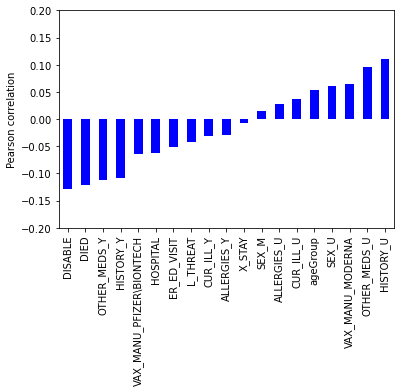

In [101]:
ax = correlations.plot(kind='bar', color='b')
ax.set(ylim=[-0.2, 0.2], ylabel= 'Pearson correlation')

In [103]:
from sklearn.preprocessing import MinMaxScaler

fields = ['ageGroup', 'SEX_M']
X = encoded_df[fields]
scaler= MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
X

,ageGroup_scaled,SEX_M_scaled
0,0.2,0.0
1,0.0,0.0
2,0.2,0.0
3,0.0,1.0
4,0.2,0.0
...,...,...
436111,0.2,0.0
436112,0.2,0.0
436113,0.2,0.0
436114,0.2,0.0


__Part 2: Linear Decision Boundry__

    __Our Goul__: is to look at the decision boundry of this dataset

> - fit a linear Support Vector Machine Classifier to X, y
> - Pick 300 samples from X. Get corresponding y value. Because our dataset is too arge and it produces crowded plot. 
> - Modify 0 and 1 of y to the original Y: recovered and N: not recovered
> - scatter plot X, and plot the decision surface


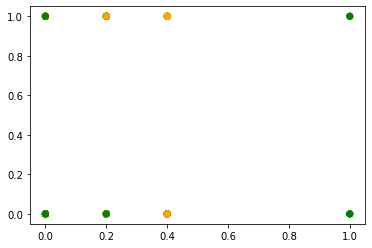

In [87]:
LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(500, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'green' if r == 1 else 'orange')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color= y_color, alpha=1)

[(0.0, 1.0), (0.0, 1.0), Text(0.5, 1.0, 'decision boundry for LinearSVC')]

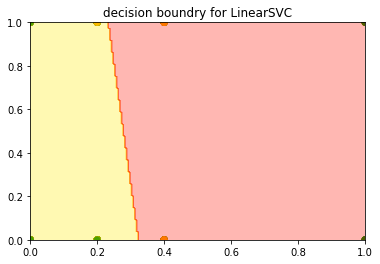

In [106]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'green' if r == 1 else 'orange')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color= y_color, alpha=1)
# -----------------
x_axis, y_axis =np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame((xx_ravel, yy_ravel)).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap= plt.cm.autumn_r, alpha=.3)
# -----------------
ax.set(
    x_label= fields[0],
    y_label= fields[1],
    xlim=[0,1],
    ylim=[0,1],
    title= 'decision boundry for LinearSVC')